In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt



In [2]:
weight = 0.9
bias = 0.3

start = 0
end = 1
step = 0.01

X = torch.arange(start,end,step).unsqueeze(dim=1)
Y = weight * X + bias

In [3]:
train_split = int(0.8 * len(X))
X_train, Y_train = X[:train_split], Y[:train_split]
X_test, Y_test = X[train_split:], Y[train_split:]

In [4]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
            return self.linear_layer(x)
        

def PlotPredictions(train_data = X_train,
                    train_labels = Y_train,
                    test_data = X_test,
                    test_labels = Y_test,
                    predictions = None):
    print(len(test_data))
    print(len(test_labels))
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b",s=4, label="training data")
    plt.scatter(test_data, test_labels, c="g", s=4, label="testing data")
    if predictions is not None:
        plt.scatter(test_data, predictions, c="r",s=4, label="Predictions")

    plt.legend(prop={"size": 14})

model_1 = LinearRegressionModelV2()

In [5]:
loss_function = nn.L1Loss()
optimiser = torch.optim.SGD(params=model_1.parameters(),
                            lr=0.01)
torch.manual_seed(42)


epochs = 2000

for epoch in range(epochs):
    Y_pred = model_1(X_train)

    loss = loss_function(Y_pred, Y_train)

    optimiser.zero_grad()

    loss.backward()

    optimiser.step()

    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_function(test_pred, Y_test)

        if epoch % 100 == 0:
            print(f"Epoch: {epoch} | Train loss: {loss} | Test loss: {test_loss}")


Epoch: 0 | Train loss: 1.016702651977539 | Test loss: 1.387751579284668
Epoch: 100 | Train loss: 0.07969115674495697 | Test loss: 0.2116340845823288
Epoch: 200 | Train loss: 0.042667455971241 | Test loss: 0.10004973411560059
Epoch: 300 | Train loss: 0.008409976959228516 | Test loss: 0.01910175010561943
Epoch: 400 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 500 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 600 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 700 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 800 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 900 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 1000 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 1100 | Train loss: 0.00253661978058517 | Test loss: 0.008270966820418835
Epoch: 1200 | Train loss: 0.00253661978058517 | Test loss: 0.0

The model learned the following values for weights and bias:
OrderedDict([('linear_layer.weight', tensor([[0.8945]])),
             ('linear_layer.bias', tensor([0.2996]))])

And the original values for weights and bias are:
weights: 0.9, bias: 0.3
20
20


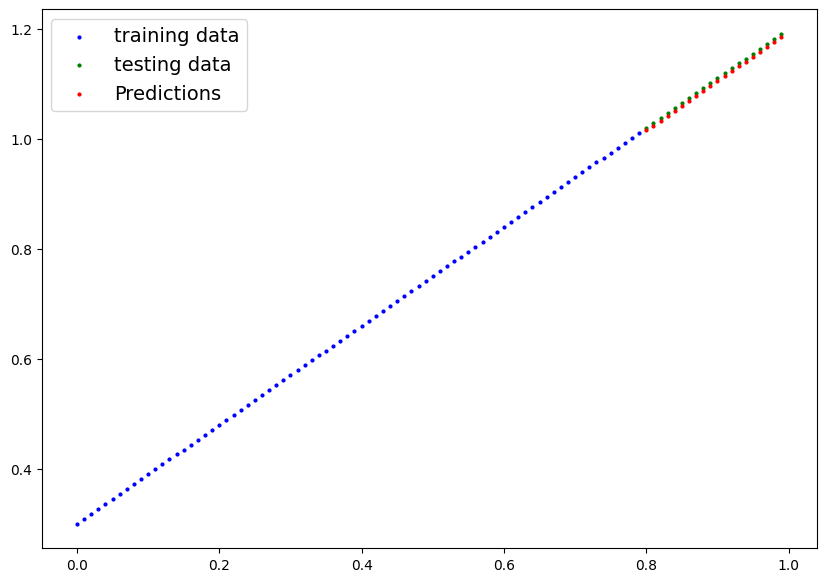

In [6]:
from pprint import pprint # pprint = pretty print, see: https://docs.python.org/3/library/pprint.html 
print("The model learned the following values for weights and bias:")
pprint(model_1.state_dict())
print("\nAnd the original values for weights and bias are:")
print(f"weights: {weight}, bias: {bias}")


# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)

PlotPredictions(predictions=y_preds)

